<a href="https://colab.research.google.com/github/AdityaKalkeri/Evaluation_Projects/blob/main/Project13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("viridis")

In [3]:
from google.colab import files
upload = files.upload()

Saving Final_Train.xlsx to Final_Train.xlsx


In [4]:
import io
df = pd.read_excel(io.BytesIO(upload['Final_Train.xlsx']))

In [5]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [7]:
for i in df.columns:
    print(i)
    print(df[i].unique())

Qualification
['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
Experience
['24 years experience' '12 years experience' '9 years experience'
 '20 years experience' '8 years experience' '42 years experience'
 '10 years experience' '14 years experience' '23 years experience'
 '5 years experience' '7 years experience' '21 years experience'
 '19 years experience' '41 years experience' '31 years experience'
 '25 years experience' '16 years experience' '15 years experience'
 '11 years experience' '22 years experience' '38 years experience'
 '6 years experience' '36 years experience' '13 years experience'
 '18 years experience' '46 years experience' '40 years experience'
 '49 years experience' '33 years ex

In [8]:
import re

## Cleaning the dataset

In [9]:
#Qualification

In [10]:
df.groupby("Qualification")['Qualification'].count().sort_values(ascending = False).head(25)

Qualification
BDS                                                 488
BHMS                                                477
BAMS                                                471
MBBS                                                334
MBBS, MS - ENT                                      220
MBBS, MD - Dermatology                              178
MBBS, MD - General Medicine                         177
MBBS, MD - Dermatology , Venereology & Leprosy      140
BHMS, MD - Homeopathy                                93
MBBS, DDVL                                           92
MBBS, Diploma in Otorhinolaryngology (DLO)           84
BAMS, MD - Ayurveda Medicine                         82
BDS, MDS - Conservative Dentistry & Endodontics      68
MBBS, DDV                                            66
BDS, MDS                                             63
BDS, MDS - Oral & Maxillofacial Surgery              57
MD - Dermatology , Venereology & Leprosy, MBBS       52
BDS, MDS - Prosthodontics         

In [11]:
txt = "The rain in Spain"
x = re.search("ai", txt)
print(x)                                   #this will print an object 

<_sre.SRE_Match object; span=(5, 7), match='ai'>


In [12]:
def mbbs_ms(row):
    x = re.findall("\AMBBS, MS", row['Qualification'])
    if 'MBBS, MS' in x:
        row['Qualification'] = 'MBBS, MS'
    return row
df = df.apply(mbbs_ms, axis = 1)

In [13]:
def mbbs_md(row):
    x = re.findall("\AMBBS, MD" ,row['Qualification'])
    if 'MBBS, MD' in x:
        row['Qualification'] = 'MBBS, MD'
    return row
df = df.apply(mbbs_md, axis = 1)

In [14]:
def mbbs(row):
    if (row['Qualification'] == 'MBBS, MS') or (row['Qualification'] == 'MBBS, MD'):
        return row
    x = re.findall("MBBS", row['Qualification'])
    if 'MBBS' in x:
        row['Qualification'] = 'MBBS'
    return row
df = df.apply(mbbs, axis = 1)

In [15]:
def bhms_ms(row):
    x = re.findall("\ABHMS, MS", row['Qualification'])
    if 'BHMS, MS' in x:
        row['Qualification'] = 'BHMS, MS'
    return row
df = df.apply(bhms_ms, axis = 1)

In [16]:
def bhms_md(row):
    x = re.findall("\ABHMS, MD", row['Qualification'])
    if 'BHMS, MD' in x:
        row['Qualification'] = 'BHMS, MD'
    return row
df = df.apply(bhms_md, axis = 1)

In [17]:
def bhms(row):
    if (row['Qualification'] == 'BHMS, MS') or (row['Qualification'] == 'BHMS, MD'):
        return row
    x = re.findall("\ABHMS", row['Qualification'])
    if 'BHMS' in x:
        row['Qualification'] = 'BHMS'
    return row
df = df.apply(bhms, axis = 1)

In [18]:
def bams_ms(row):
    x = re.findall("\ABAMS, MS", row['Qualification'])
    if 'BAMS, MS' in x:
        row['Qualification'] = 'BAMS, MS'
    return row
df = df.apply(bams_ms, axis = 1)

In [19]:
def bams_md(row):
    x = re.findall("\ABAMS, MD", row['Qualification'])
    if 'BAMS, MD' in x:
        row['Qualification'] = 'BAMS, MD'
    return row
df = df.apply(bams_md, axis = 1)

In [20]:
def bds_mds(row):
    x = re.findall("\ABDS, MDS", row['Qualification'])
    if 'BDS, MDS' in x:
        row['Qualification'] = 'BDS, MDS'
    return row
df = df.apply(bds_mds, axis = 1)

In [21]:
def bds(row):
    x = re.findall("\ABDS", row['Qualification'])
    if 'BDS' in x:
        row['Qualification'] = 'BDS'
    return row
df = df.apply(bds_mds, axis = 1)

In [22]:
def md(row):
    if (row['Qualification'] in ['MBBS, MD', "BHMS, MD", "BAMS, MD"]):
        return row
    x = re.findall("MD", row['Qualification'])
    if 'MD' in x:
        row['Qualification'] = 'MD'
    return row
df = df.apply(md, axis = 1)

In [23]:
top10 = list(df.groupby("Qualification")['Qualification'].count().sort_values(ascending = False).head(10).index)

We will perform one hot encoding on the 'Qualification' column, selecting only the top 10 categories. Rest of the qualifications will be stored in others

In [24]:
def other(row):
    if row['Qualification'] in top10:
        return row
    else:
        row['Qualification'] = 'Other'
    return row
df = df.apply(other, axis  = 1)

In [25]:
df.groupby("Qualification")['Qualification'].count().sort_values(ascending = False)

Qualification
MBBS        1534
MD           960
MBBS, MD     862
BHMS         566
BDS          488
BAMS         471
MBBS, MS     409
Other        398
BHMS, MD     125
BAMS, MD     114
BAMS, MS      34
Name: Qualification, dtype: int64

In [26]:
#Experience

In [27]:
df['Experience'].head()

0    24 years experience
1    12 years experience
2     9 years experience
3    12 years experience
4    20 years experience
Name: Experience, dtype: object

we will extract only the year

In [28]:
def exp(row):
    x = re.findall("\d+", row['Experience'])
    row['Experience'] = x[0]
    return row
df = df.apply(exp, axis = 1)

In [29]:
df["Experience"].head()

0    24
1    12
2     9
3    12
4    20
Name: Experience, dtype: object

In [30]:
df.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,Other,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD",14,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,Other,23,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [31]:
#Rating

In [32]:
def rating(row):
    def isNaN(string):
        return string != string
    if isNaN(row['Rating']):
        return row
    x = re.findall("\d+", row['Rating'])
    row['Rating'] = x[0]
    return row
df = df.apply(rating, axis = 1)
    

In [33]:
#Place

In [34]:
df['Place'].unique()

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', 'Bannerghatta Road, Bangalore',
       'Keelkattalai, Chennai', 'Porur, Chennai', 'Karol Bagh, Delhi',
       'Arekere, Bangalore', 'Old City, Hyderabad', 'Athani, Ernakulam',
       'Thousand Lights, Chennai', 'Somajiguda, Hyderabad',
       'Coimbatore Racecourse, Coimbatore', 'Jubilee Hills, Hyderabad',
       'Kondli, Delhi', 'Saroor Nagar, Hyderabad',
       'Tambaram West, Chennai', 'Purasawakkam, Chennai',
       'KPHB, Hyderabad', 'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Vasundhra Enclave, Delhi', 'Chembur, Mumbai',
       'Thammanam, Ernakulam', 'Andheri, Mumbai',
       'Pattom, Thiruvananthapuram', 'Kukatpally, Hyderabad',
       'Vadavalli, Coimbatore', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'Sion West, Mumbai', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'IP Extension, Delhi',
       'Safdarjung Enclave, Delhi', 'New Friends Colony, Delhi

In [35]:
def mumbai(row):
    def isNaN(string):
        return string != string
    if isNaN(row['Place']):
        return row
    x = re.findall("Mumbai", row['Place'])
    
    if 'Mumbai' in x:
        row['Place'] = 'Mumbai'
    return row
df = df.apply(mumbai, axis = 1)

In [36]:
def delhi(row):
    def isNaN(string):
        return string != string
    if isNaN(row['Place']):
        return row
    x = re.findall("Delhi", row['Place'])
    
    if 'Delhi' in x:
        row['Place'] = 'Delhi'
    return row
df = df.apply(delhi, axis = 1)

In [37]:
def chennai(row):
    def isNaN(string):
        return string != string
    if isNaN(row['Place']):
        return row
    x = re.findall("Chennai", row['Place'])
    
    if 'Chennai' in x:
        row['Place'] = 'Chennai'
    return row
df = df.apply(chennai, axis = 1)

In [38]:
def blore(row):
    def isNaN(string):
        return string != string
    if isNaN(row['Place']):
        return row
    x = re.findall("Bangalore", row['Place'])
    
    if 'Bangalore' in x:
        row['Place'] = 'Bangalore'
    return row
df = df.apply(blore, axis = 1)

In [39]:
def ctore(row):
    def isNaN(string):
        return string != string
    if isNaN(row['Place']):
        return row
    x = re.findall("Coimbatore", row['Place'])
    
    if 'Coimbatore' in x:
        row['Place'] = 'Coimbatore'
    return row
df = df.apply(ctore, axis = 1)

In [40]:
def hyd(row):
    def isNaN(string):
        return string != string
    if isNaN(row['Place']):
        return row
    x = re.findall("Hyderabad", row['Place'])
    
    if 'Hyderabad' in x:
        row['Place'] = 'Hyderabad'
    return row
df = df.apply(hyd, axis = 1)

In [41]:
def ernakulam(row):
    def isNaN(string):
        return string != string
    if isNaN(row['Place']):
        return row
    x = re.findall("Ernakulam", row['Place'])
    
    if 'Ernakulam' in x:
        row['Place'] = 'Ernakulam'
    return row
df = df.apply(ernakulam, axis = 1)

In [42]:
def thiru(row):
    def isNaN(string):
        return string != string
    if isNaN(row['Place']):
        return row
    x = re.findall("Thiruvananthapuram", row['Place'])
    
    if 'Thiruvananthapuram' in x:
        row['Place'] = 'Thiruvananthapuram'
    return row
df = df.apply(thiru, axis = 1)

In [43]:
df.groupby("Place")['Place'].count().sort_values(ascending = False)

Place
Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
e                        1
Name: Place, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [45]:
df['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [46]:
df['Miscellaneous_Info'].head(10)

0                 100% 16 Feedback Kakkanad, Ernakulam
1                98% 76 Feedback Whitefield, Bangalore
2                                                  NaN
3    Bannerghatta Road, Bangalore ₹250 Available on...
4                100% 4 Feedback Keelkattalai, Chennai
5                                                  NaN
6                                                  NaN
7    Dental Fillings Crowns and Bridges Fixing Impa...
8                                                  NaN
9                                                  NaN
Name: Miscellaneous_Info, dtype: object

We will drop this column as we alrady have the doctor ratings. Plus this will make our analysis simple

In [47]:
df.drop("Miscellaneous_Info", axis = 1, inplace = True)

In [48]:
#Lets begin the Exploratory Data Analysis

## Exploratory Data Analysis

In [49]:
df.head(10)

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD",24,100,Ernakulam,Homeopath,100
1,"BAMS, MD",12,98,Bangalore,Ayurveda,350
2,"MBBS, MS",9,NaN,Bangalore,ENT Specialist,300
3,Other,12,NaN,Bangalore,Ayurveda,250
4,BAMS,20,100,Chennai,Ayurveda,250
5,BAMS,8,NaN,Chennai,Ayurveda,100
6,BHMS,42,NaN,Delhi,Homeopath,200
7,BDS,10,99,Bangalore,Dentist,200
8,"MBBS, MD",14,NaN,Hyderabad,General Medicine,100
9,Other,23,NaN,Ernakulam,Dentist,100


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


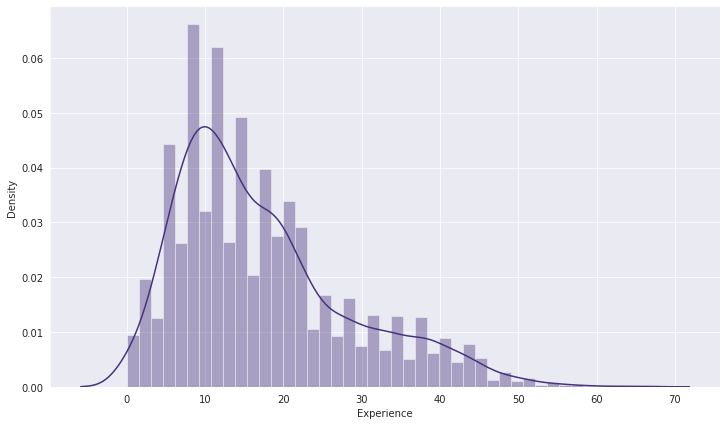

In [50]:
plt.figure().set_size_inches(12,7)
sns.distplot(df['Experience'])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


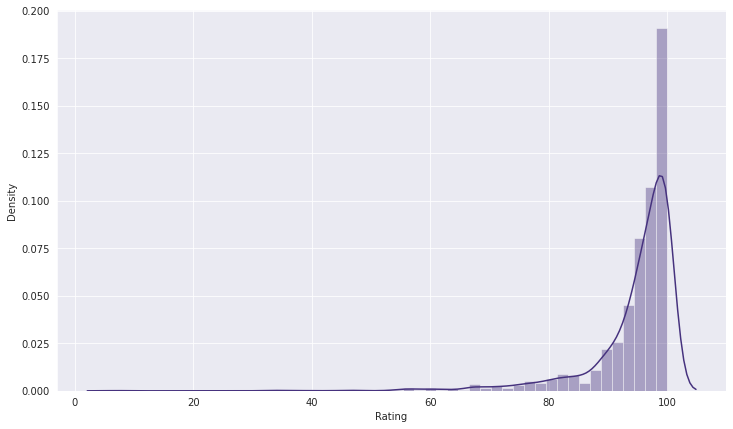

In [51]:
plt.figure().set_size_inches(12,7)
sns.distplot(df['Rating'])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


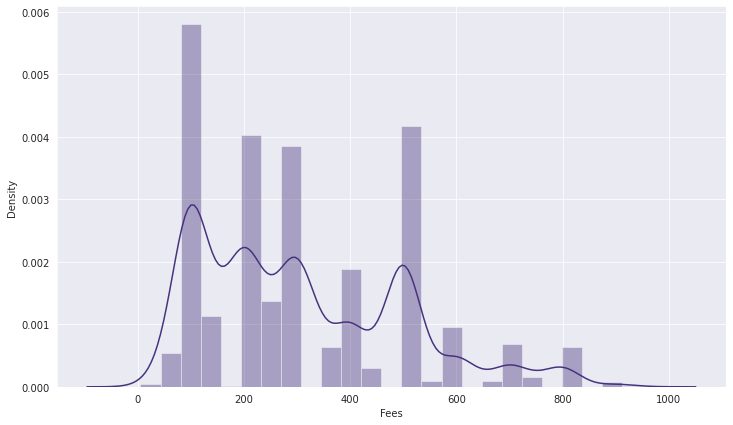

In [52]:
plt.figure().set_size_inches(12,7)
sns.distplot(df['Fees'])


In [53]:
df['Rating'] = df['Rating'].astype(str).astype(float)
df['Experience'] = df['Experience'].astype(str).astype(float)

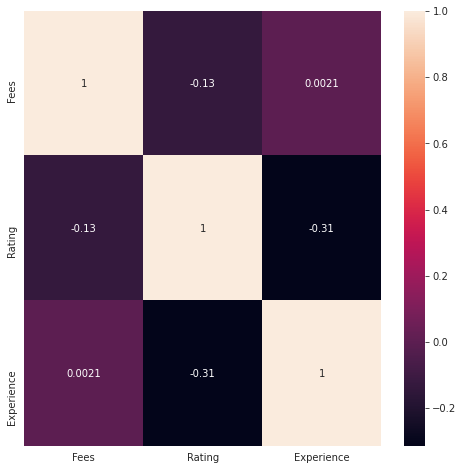

In [54]:
plt.figure().set_size_inches(8,8)
sns.heatmap(df[['Fees', 'Rating', 'Experience']].corr(), annot = True)

<Figure size 1080x1080 with 0 Axes>

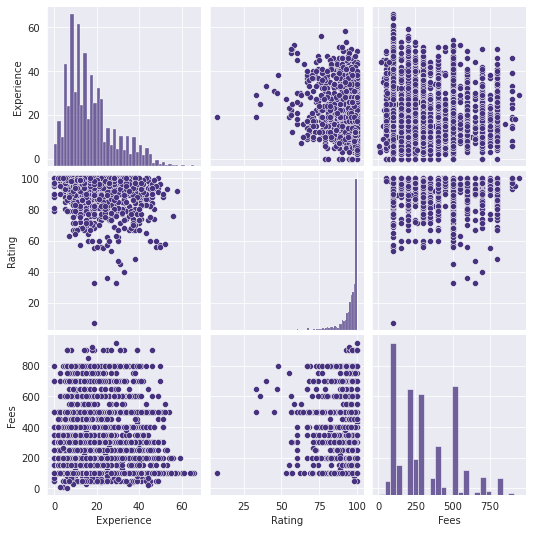

In [55]:
plt.figure().set_size_inches(15,15)
sns.pairplot(data = df)

As we can see from the above heatmap and pairplot, the features are independant of each other, but also have low correlation with consultation Fees

In [56]:
#Lets take a look at categorical variables

In [57]:
#Place

In [58]:
print(df.shape)
df = df[df['Place']!='e']
print(df.shape)

(5961, 6)
(5960, 6)


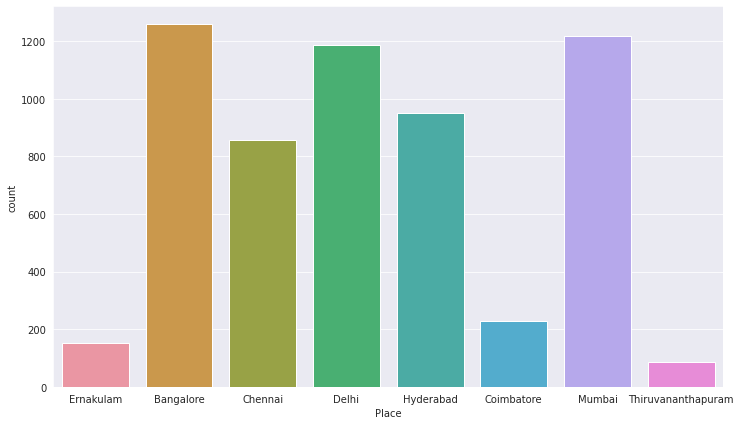

In [59]:
plt.figure().set_size_inches(12,7)
sns.countplot(x = 'Place', data = df)

Most of the doctors surveyed are from Banglore, Mumbai, Delhi, Hyderabad

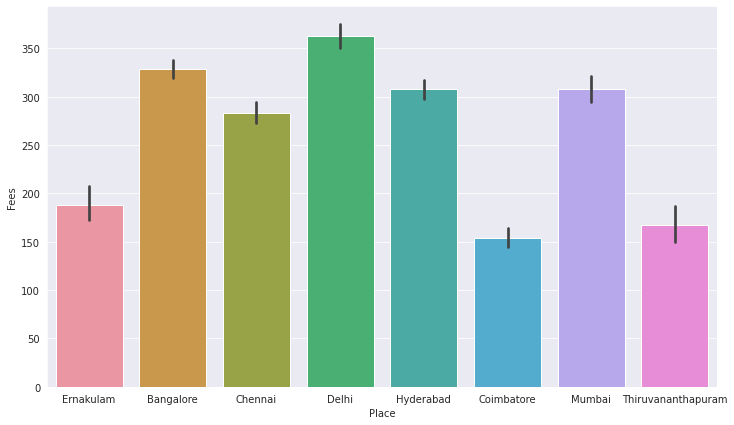

In [60]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'Place', y ='Fees', data = df)

Consultation fees is Delhi is high. Bangalore, Hyderabad and Mumbai doctor fees are also costly

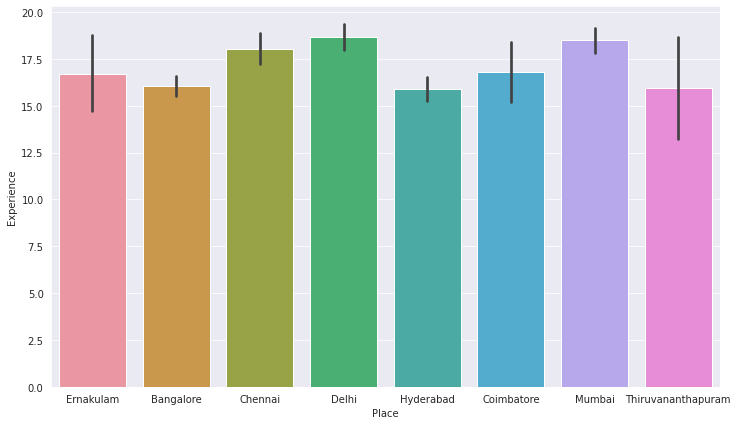

In [61]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'Place', y ='Experience', data = df)

In [62]:
#Qualification

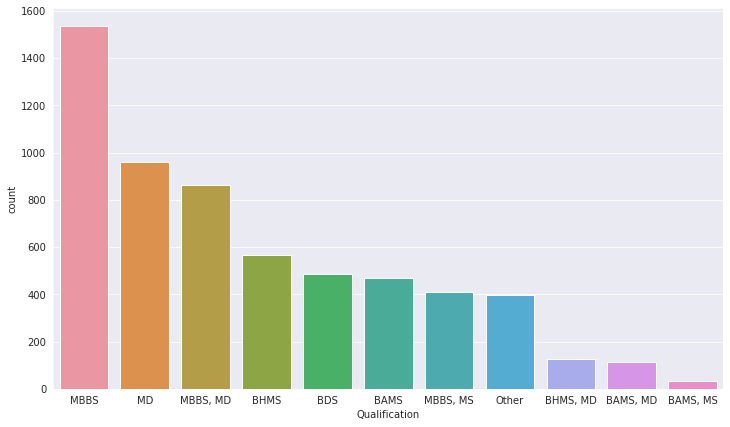

In [63]:
plt.figure().set_size_inches(12,7)
sns.countplot(x = 'Qualification', data = df, order = df['Qualification'].value_counts().index)

As we see, there are a lot of Doctors who are MBBS or have done MBBS, MD (Medicinae Doctor, post-grad degree)

MD is Post-Grad in Dentistry.

Mostly the Doctors who have done MBBS are opting for MBBS, MD.

MBBS, MS (Master of Surgery) seems to be less in number.

BDS is Bachelor of Dental Surgery also are in average number

BHMS is Bachelor of Homeopathy Medicine

BAMS is Bachelor of Ayurvedic Medicine

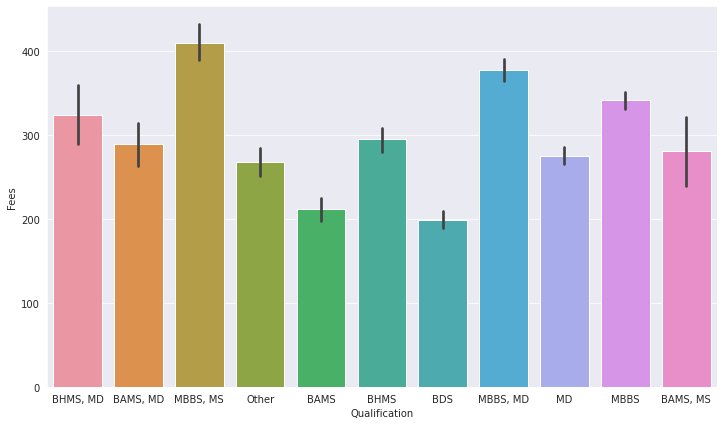

In [64]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'Qualification', y = 'Fees', data = df)

The highest fees are charged by 'MBBS, MS','MBBS, MD' doctors, which is logical as the patients usually go to such specialist doctors for serious cases.

Dentist are charging lowest consultation fees, BAMS (Ayurveda) doctor consultation fees are also low

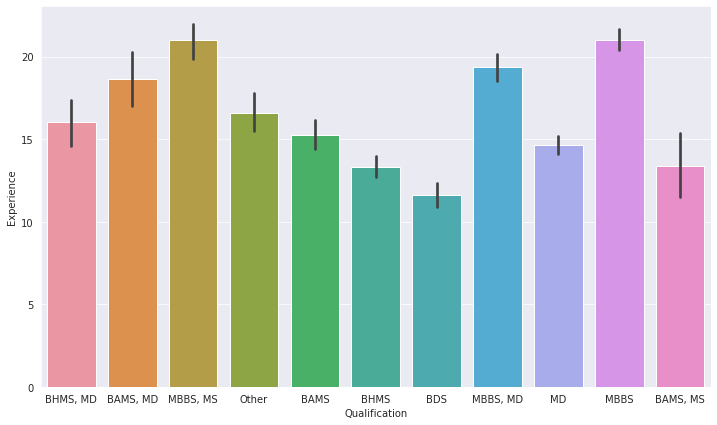

In [65]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'Qualification', y = 'Experience', data = df)

Doctors with post-grad degrees are highly experienced, while Dentists have lower experiance

In [66]:
#Profile

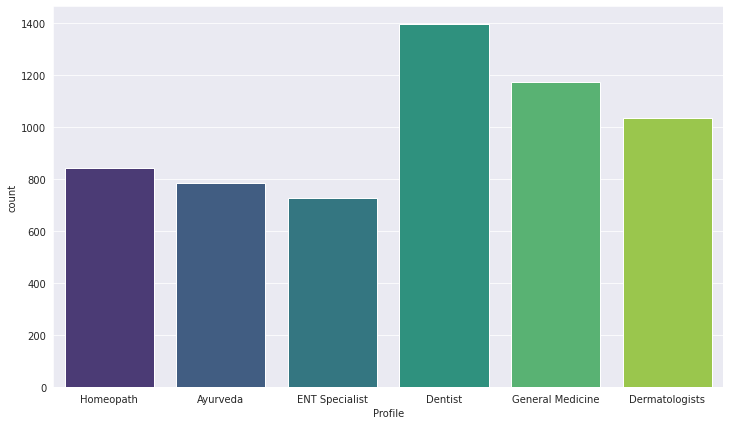

In [67]:
plt.figure().set_size_inches(12,7)
sns.countplot(x = "Profile", data = df)

In [68]:
dentist = df[df['Profile'] == 'Dentist']

In [69]:
dentist.groupby("Qualification").count()

,Experience,Rating,Place,Profile,Fees
Qualification,,,,,
BDS,487,248,487,487,487
MBBS,1,0,1,1,1
MD,763,522,763,763,763
Other,145,111,145,145,145


So most of the dentists are MD 

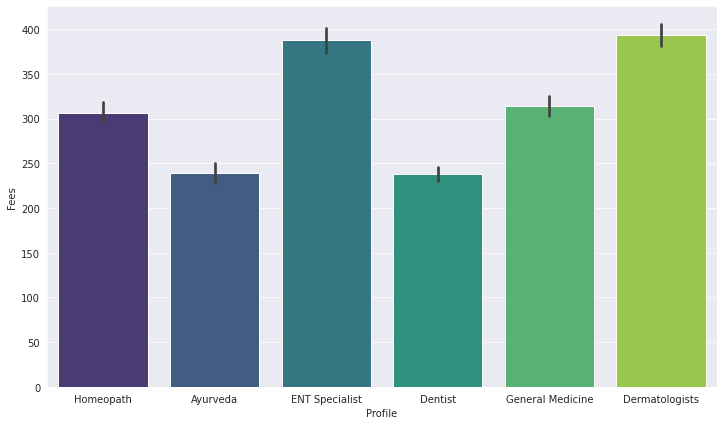

In [70]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'Profile', y = "Fees", data = df)

Dermatologists and ENT specialists charge more, while Doctors of Ayurveda or Dental clinic charge much less.

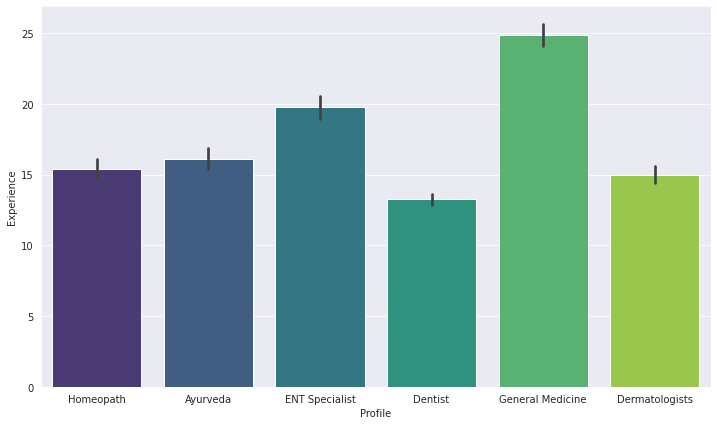

In [71]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'Profile', y = "Experience", data = df)

Doctors practicing General Medicine are most experienced, even ENT specialists have good amount of experience

## Data Preprocessing

In [72]:
#Null data imputation

In [73]:
df.isnull().sum()

Qualification       0
Experience          0
Rating           3301
Place              25
Profile             0
Fees                0
dtype: int64

In [74]:
#Place
prop = df['Place'].isnull().sum()/df['Place'].count()
print("Proportion of Null values: {}".format(prop))

Proportion of Null values: 0.004212299915754001


we can drop the null values of Place

In [75]:
#Rating
prop = df['Rating'].isnull().sum()/df['Rating'].count()
print("Proportion of Null values: {}".format(prop))

Proportion of Null values: 1.2414441519368185


As we saw in the Distribution of data of 'Rating', the majority of rating are in the range of 95 and 100.
So we will randomly impute value between 80 and 100 inplace of NaN

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


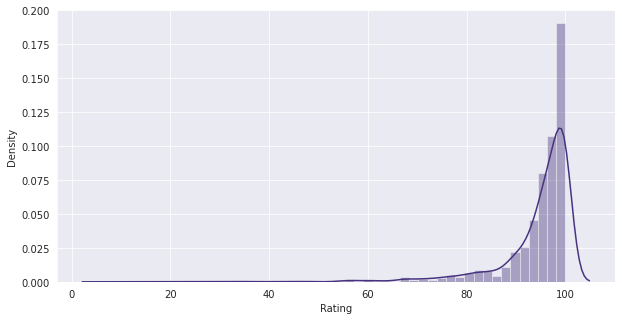

In [76]:
plt.figure().set_size_inches(10,5)
sns.distplot(df['Rating'])

In [77]:
from random import choice
impute_list = [i for i in range(95,101)]
def imputer(row):
    if np.isnan(row['Rating']):
        row["Rating"] = choice(impute_list)
    return row
df = df.apply(imputer, axis = 1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


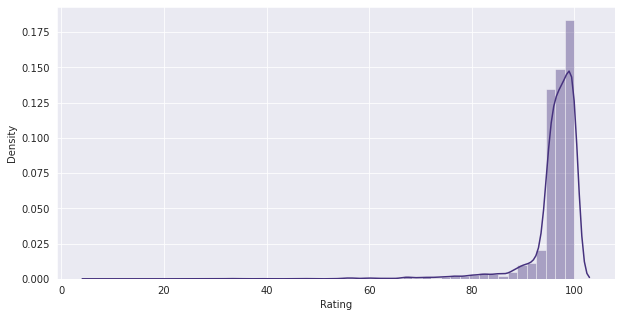

In [78]:
plt.figure().set_size_inches(10,5)
sns.distplot(df['Rating'])

So the graph has changed but not by much

In [79]:
#Removing noise

In [80]:
print(df.shape)
df.dropna(inplace = True)
print(df.shape)

(5960, 6)
(5935, 6)


### One hot encoding

In [81]:
def encode(column):
    global df
    print(df.shape)
    cols = pd.get_dummies(df[column], drop_first = True)
    df = pd.concat([df, cols], axis = 1)
    df.drop(column, axis =1, inplace = True)
    print(df.shape)

In [82]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'Fees'], dtype='object')

In [83]:
encode("Qualification")

(5935, 6)
(5935, 15)


In [84]:
encode("Place")

(5935, 15)
(5935, 21)


In [85]:
encode("Profile")

(5935, 21)
(5935, 25)


In [86]:
from scipy.stats import zscore
z = abs(zscore(df))
print(df.shape)
df = df.loc[(z<3).all(axis = 1)]
df.shape

(5935, 25)


(3413, 25)

### Train_Test_Split

In [87]:
from sklearn.model_selection import train_test_split
X = df.drop("Fees", axis =1)
y = df['Fees']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

### Scaling the values

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [89]:
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# Model Building

In [90]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train_sc, y_train)
y_train_pred = linreg.predict(X_train_sc)
print("Training Accuracy = {}".format(r2_score(y_train, y_train_pred)))
y_pred = linreg.predict(X_test_sc)
r2_score(y_test, y_pred)

Training Accuracy = 0.1369797535920464


0.1285532109237273

In [91]:
from sklearn.neighbors import KNeighborsRegressor
max_r2 = 0
k = 0
for i in range(1,51):
    knr = KNeighborsRegressor(n_neighbors = i).fit(X_train_sc,y_train)
    y_pred = knr.predict(X_test_sc)
    r2 = r2_score(y_test, y_pred)
    print("Accuracy for k = {} is {}".format(i, r2))
    if max_r2< r2:
        max_r2 = r2
        k = i
        
print("Max R2 score = {} for k = {}".format(max_r2, k))
    

Accuracy for k = 1 is -0.5821104443656071
Accuracy for k = 2 is -0.23023613534769205
Accuracy for k = 3 is -0.12724865036489796
Accuracy for k = 4 is -0.04706633388463333
Accuracy for k = 5 is 0.009769553096469652
Accuracy for k = 6 is 0.04359046641923725
Accuracy for k = 7 is 0.06395210419561115
Accuracy for k = 8 is 0.08085785954840752
Accuracy for k = 9 is 0.09441258953813902
Accuracy for k = 10 is 0.11189301801886897
Accuracy for k = 11 is 0.12355328245224217
Accuracy for k = 12 is 0.12849486183516312
Accuracy for k = 13 is 0.13074714851107871
Accuracy for k = 14 is 0.12930694429838907
Accuracy for k = 15 is 0.13046227828513657
Accuracy for k = 16 is 0.13546966516362258
Accuracy for k = 17 is 0.13349309925053543
Accuracy for k = 18 is 0.13626653515467568
Accuracy for k = 19 is 0.135122170019227
Accuracy for k = 20 is 0.1378586730393756
Accuracy for k = 21 is 0.14001157616651272
Accuracy for k = 22 is 0.14095483165096245
Accuracy for k = 23 is 0.14102263167424167
Accuracy for k = 24

In [92]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_sc,y_train)
y_train_pred = ridge.predict(X_train_sc)
print("Training Accuracy = {}".format(r2_score(y_train, y_train_pred)))
y_pred = ridge.predict(X_test_sc)
r2_score(y_test, y_pred)

Training Accuracy = 0.13697781726885228


0.12863371932337597

In [93]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train_sc,y_train)
y_train_pred = lasso.predict(X_train_sc)
print("Training Accuracy = {}".format(r2_score(y_train, y_train_pred)))
y_pred = lasso.predict(X_test_sc)
r2_score(y_test, y_pred)

Training Accuracy = 0.135897382499664


0.13031962950768605

None of the regressors are giving satisfactory results.
Lets apply PCA, normalize the data and then apply Regressor models

In [94]:
from sklearn.preprocessing import Normalizer
normal = Normalizer().fit(X_train)

In [95]:
X_train = normal.transform(X_train)
X_test = normal.transform(X_test)

In [96]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

Text(0, 0.5, 'Cumulative Variance')

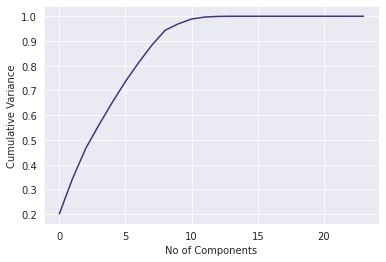

In [97]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_sc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of Components")
plt.ylabel("Cumulative Variance")

So by taking around 15 - 17 components, we will get 90% variance

In [98]:
pca = PCA(n_components = 15).fit(X_train_sc)
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [99]:
linreg = LinearRegression().fit(X_train_pca, y_train)
y_train_pred = linreg.predict(X_train_pca)
print("Training Accuracy = {}".format(r2_score(y_train, y_train_pred)))
y_pred = linreg.predict(X_test_pca)
r2_score(y_test, y_pred)

Training Accuracy = 0.14456127764070115


0.1314151870123511

In [100]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_pca,y_train)
y_train_pred = ridge.predict(X_train_pca)
print("Training Accuracy = {}".format(r2_score(y_train, y_train_pred)))
y_pred = ridge.predict(X_test_pca)
r2_score(y_test, y_pred)

Training Accuracy = 0.14455842460775814


0.13154937388607313

In [101]:
from sklearn.neighbors import KNeighborsRegressor
max_r2 = 0
k = 0
for i in range(1,51):
    knr = KNeighborsRegressor(n_neighbors = i).fit(X_train_pca,y_train)
    y_pred = knr.predict(X_test_pca)
    r2 = r2_score(y_test, y_pred)
    print("Accuracy for k = {} is {}".format(i, r2))
    if max_r2< r2:
        max_r2 = r2
        k = i
print("Max R2 score = {} for k = {}".format(max_r2, k))
    

Accuracy for k = 1 is -0.689376940531266
Accuracy for k = 2 is -0.23924534483039328
Accuracy for k = 3 is -0.12751571419068264
Accuracy for k = 4 is -0.030994660726143097
Accuracy for k = 5 is 0.020544298081261125
Accuracy for k = 6 is 0.05884875017998781
Accuracy for k = 7 is 0.06598617604442125
Accuracy for k = 8 is 0.06644644542535916
Accuracy for k = 9 is 0.06322929963664647
Accuracy for k = 10 is 0.06480918616088605
Accuracy for k = 11 is 0.07859467058108294
Accuracy for k = 12 is 0.08458356860694116
Accuracy for k = 13 is 0.08651207425247698
Accuracy for k = 14 is 0.09643217597764364
Accuracy for k = 15 is 0.10892303586913787
Accuracy for k = 16 is 0.10755255864906221
Accuracy for k = 17 is 0.11366311846599597
Accuracy for k = 18 is 0.11903308838213777
Accuracy for k = 19 is 0.12183192186549796
Accuracy for k = 20 is 0.12150987730384455
Accuracy for k = 21 is 0.12063518435062104
Accuracy for k = 22 is 0.12468422649004884
Accuracy for k = 23 is 0.12607526746790665
Accuracy for k =

In [105]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X_train_sc, y_train)
y_train_pred = dtr.predict(X_train_sc)
print("Training Accuracy = {}".format(r2_score(y_train, y_train_pred)))
y_pred = dtr.predict(X_test_sc)
r2_score(y_test, y_pred)

Training Accuracy = 0.8793459684958913


-0.5706341997570512

In [104]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train_pca,y_train)
y_train_pred = lasso.predict(X_train_pca)
print("Training Accuracy = {}".format(r2_score(y_train, y_train_pred)))
y_pred = lasso.predict(X_test_pca)
r2_score(y_test, y_pred)

Training Accuracy = 0.14201284813945358


0.13410586539188962

We wil choose Linear regression model which seems to be giving stable results, though the results are not good enough

In [106]:
from sklearn.externals import joblib
joblib.dump(linreg, 'model.joblib')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model.joblib']